In [175]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install nltk

In [3]:
import nltk

In [4]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape


(5572, 5)

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
df.sample(5)

,v1,v2
4791,ham,Gd luck 4 ur exams :-)
582,spam,We tried to contact you re your reply to our o...
1273,spam,network operator. The service is free. For T &...
410,ham,Come by our room at some point so we can iron ...
3053,ham,What happened to our yo date?


In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={'v1':'Target','v2':'message'},inplace = True)
df.head()

,Target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
df['Target']=df['Target'].map({'ham':0,'spam':1})

In [13]:
df.head()

,Target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.duplicated().sum()

403

In [15]:
df= df.drop_duplicates(keep = 'first')
df.head()

,Target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5169, 2)

In [17]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

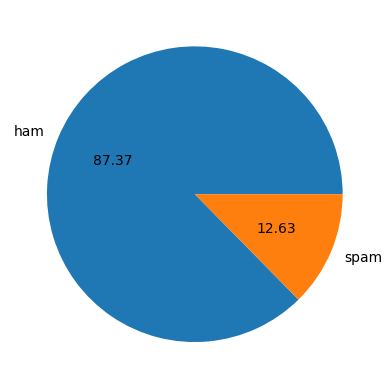

In [18]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()


In [19]:
# Data is highly imbalanced
# spam are only 12.63 percent of total mails

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Guarav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_char']=df['message'].apply(len)
df.head()

,Target,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sent']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,Target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
!pip install seaborn

In [28]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

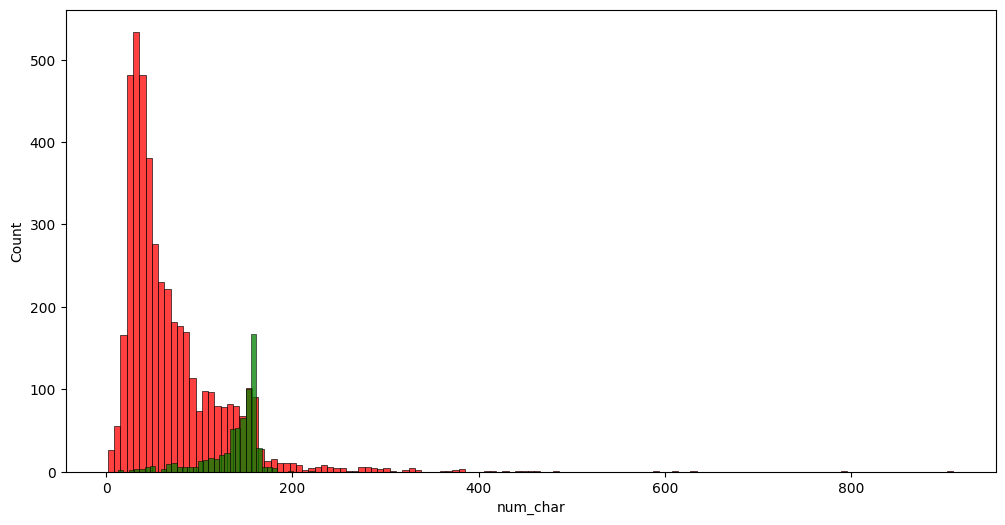

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_char'],color='red')
sns.histplot(df[df['Target']==1]['num_char'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

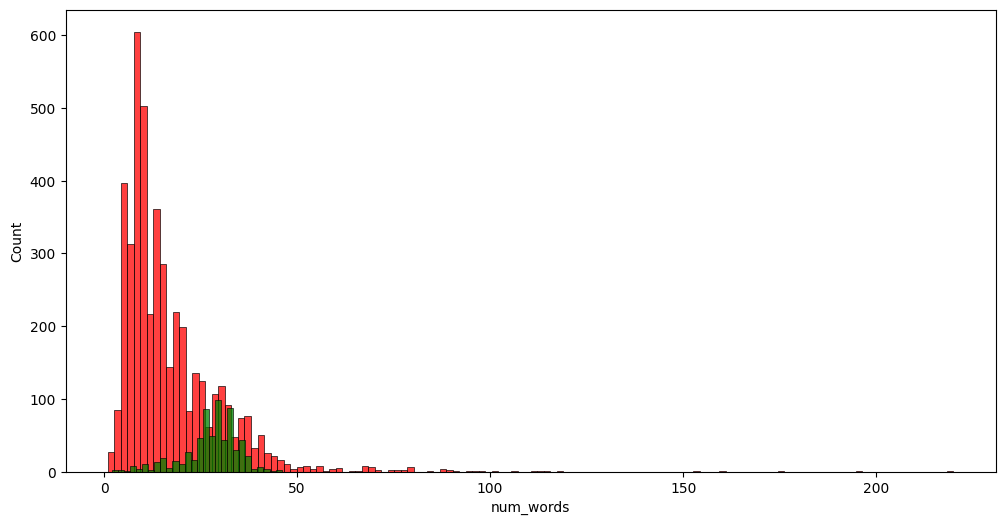

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'],color='red')
sns.histplot(df[df['Target']==1]['num_words'],color='green')

<Axes: xlabel='num_sent', ylabel='Count'>

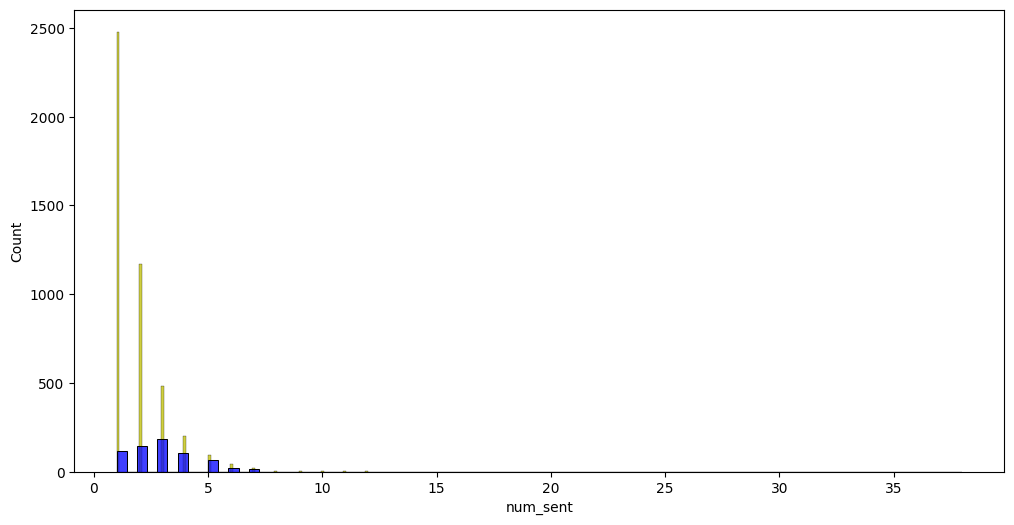

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sent'],color='y')
sns.histplot(df[df['Target']==1]['num_sent'],color='b')

C:\Users\Guarav\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


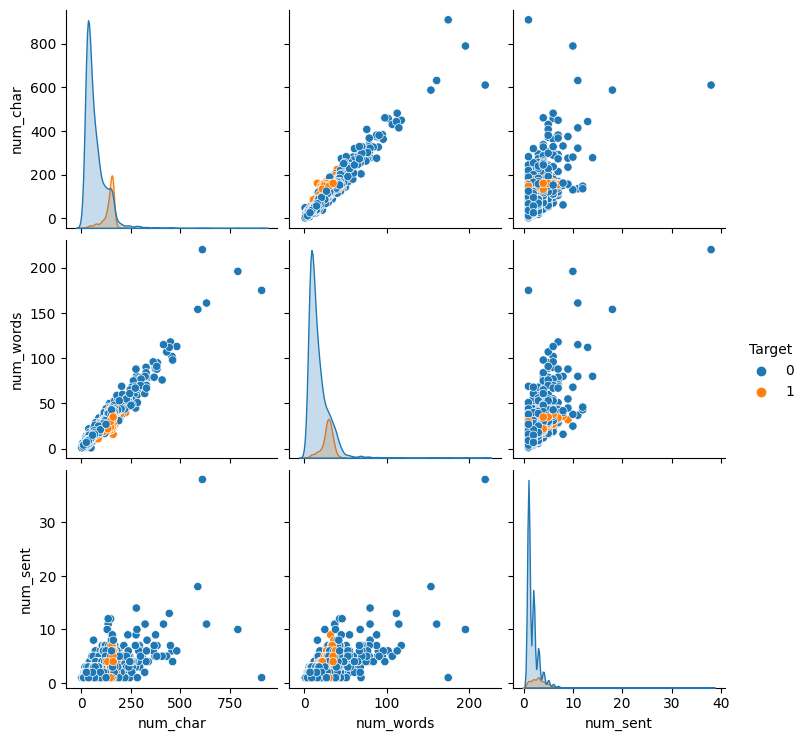

In [32]:
sns.pairplot(df,hue='Target')

In [33]:
'''Text Preprocessing
1.Lower case
2.tokenization
3.removing special characters
4.Removing stop word and punctuation
5.stemming'''

'Text Preprocessing\n1.Lower case\n2.tokenization\n3.removing special characters\n4.Removing stop word and punctuation\n5.stemming'

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Guarav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def data_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)



data_preprocessing('Hii MY Name is Nitin, I m a BOy%% GUrjar. i m a don. i m playing kho kho. i m a giga chad doing stuff like playing with girls heart')

'hii name nitin boy gurjar play kho kho giga chad stuff like play girl heart'

In [37]:
df['Text_transformed'] = df['message'].apply(data_preprocessing)
df.head()

,Target,message,num_char,num_words,num_sent,Text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
!pip install wordcloud

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,min_font_size = 8,background_color = 'black')

In [40]:
spam_wc = wc.generate(df[df['Target']==1]['Text_transformed'].str.cat(sep=" "))

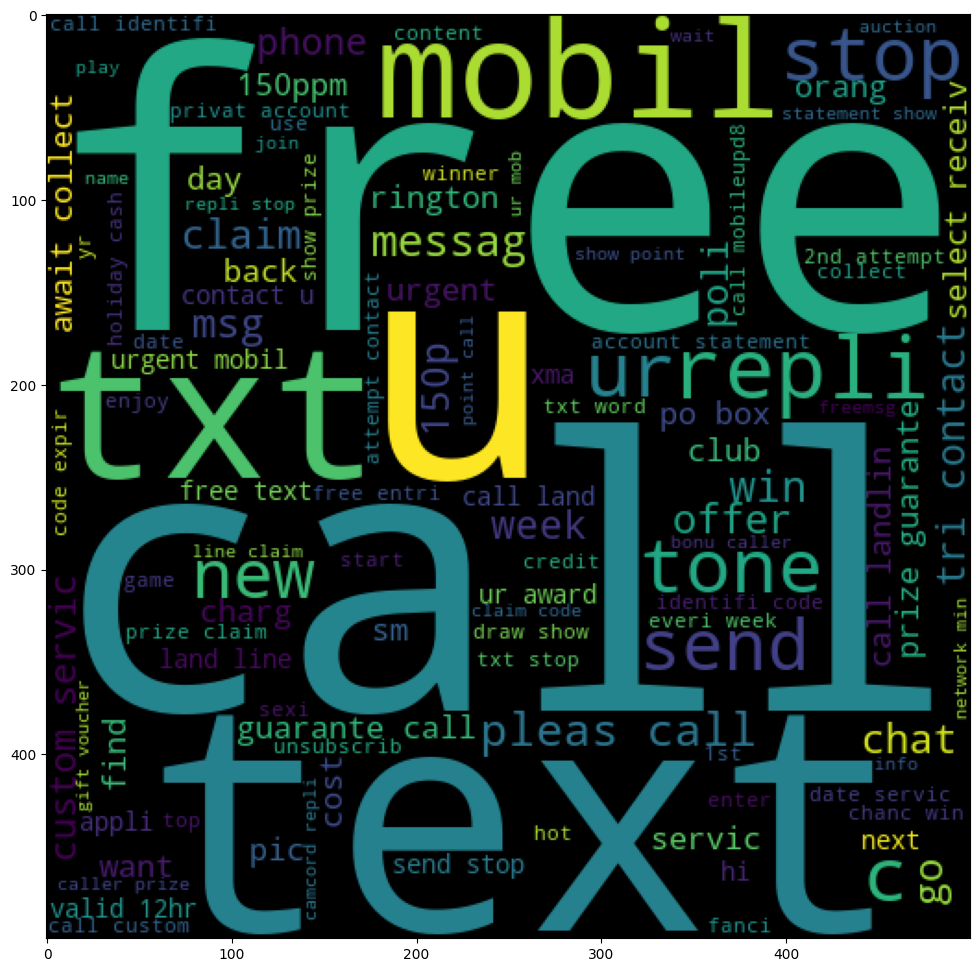

In [41]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['Target']==0]['Text_transformed'].str.cat(sep=" "))

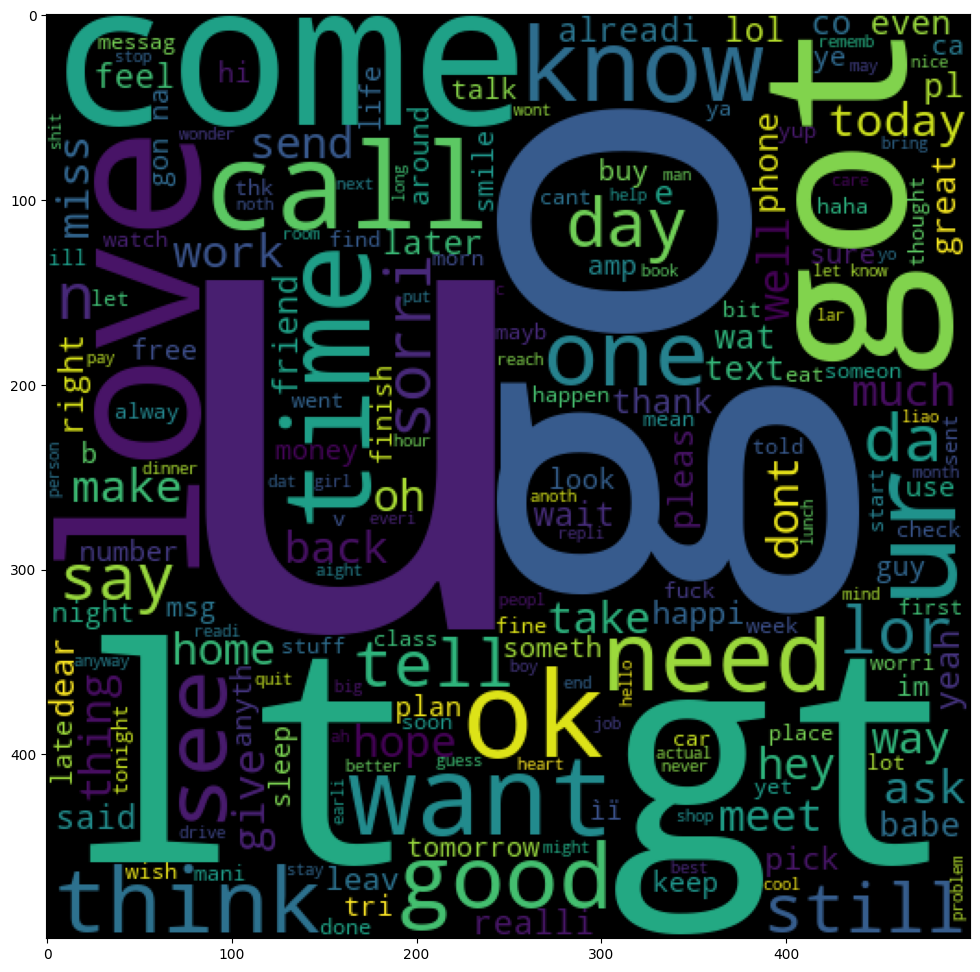

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [44]:
spam_word=[]
for msg in df[df['Target']==1]['Text_transformed'].tolist():
    for word in msg.split():
        spam_word.append(word)
        
print(len(spam_word))

9939


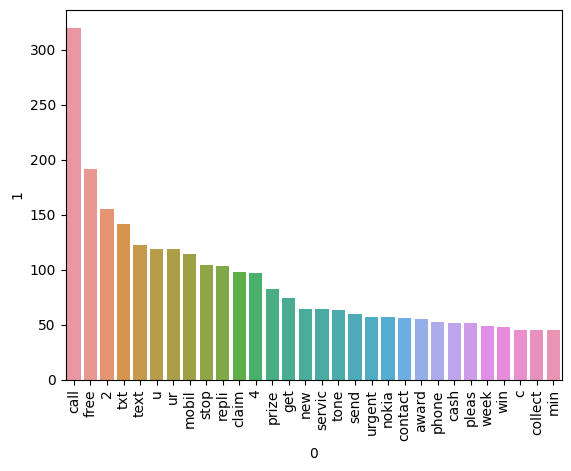

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_word).most_common(30))[0],y=pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

35404


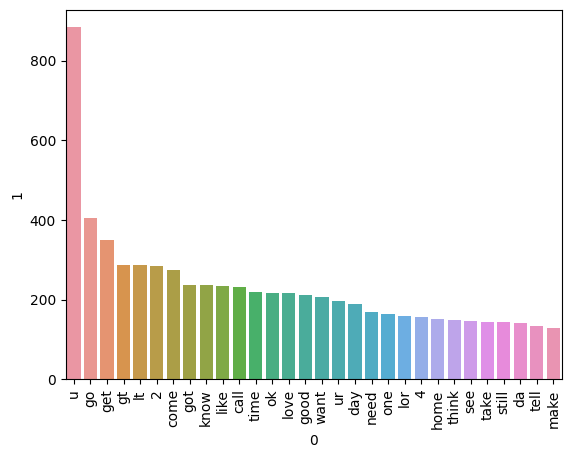

In [46]:
ham_word=[]
for msg in df[df['Target']==0]['Text_transformed'].tolist():
    for word in msg.split():
        ham_word.append(word)
        
print(len(ham_word))
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_word).most_common(30))[0],y=pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
import sklearn

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()


In [49]:
x = cv.fit_transform(df['Text_transformed']).toarray()
x.shape

(5169, 6708)

In [50]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [53]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test) 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [56]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [57]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [58]:
z = tfidf.fit_transform(df['Text_transformed']).toarray()
z.shape

(5169, 6708)

In [59]:
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=0.2,random_state = 2)

In [60]:
gnb.fit(z_train,y_train)
y_pred1 = gnb.predict(z_test) 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [61]:
mnb.fit(z_train,y_train)
y_pred2 = mnb.predict(z_test) 
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [62]:
bnb.fit(z_train,y_train)
y_pred3 = bnb.predict(z_test) 
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [65]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:
models = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt
}

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in models.items():
    
    current_accuracy,current_precision = train_classifier(clf, z_train,y_train,z_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


In [68]:
performance_precision = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_accuracy = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)


In [69]:
performance_precision

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
8,GBDT,0.952611,0.923810
3,DT,0.936170,0.846154


In [70]:
performance_accuracy

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
7,ETC,0.972921,0.982456
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
8,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154
1,KN,0.900387,1.000000


In [71]:
performance_df = pd.melt(performance_precision, id_vars ='Algorithm')

In [72]:
performance_df 

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,DT,Accuracy,0.936170
9,KN,Precision,1.000000


In [73]:
tfidf1=TfidfVectorizer(max_features = 3000)

In [74]:
z1 = tfidf1.fit_transform(df['Text_transformed']).toarray()
z1.shape

(5169, 3000)

In [75]:
z1_train,z1_test,y_train,y_test = train_test_split(z1,y,test_size=0.2,random_state = 2)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in models.items():
    
    current_accuracy,current_precision = train_classifier(clf, z1_train,y_train,z1_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [77]:
performance_precision1 = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_accuracy1 = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)


In [78]:
performance_precision1

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
8,GBDT,0.946809,0.919192
3,DT,0.930368,0.836735


In [79]:
performance_accuracy1

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
7,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
8,GBDT,0.946809,0.919192
3,DT,0.930368,0.836735
1,KN,0.905222,1.000000


In [80]:
import pickle
pickle.dump(tfidf1,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))